In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df=pd.read_csv('/content/data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Visualization

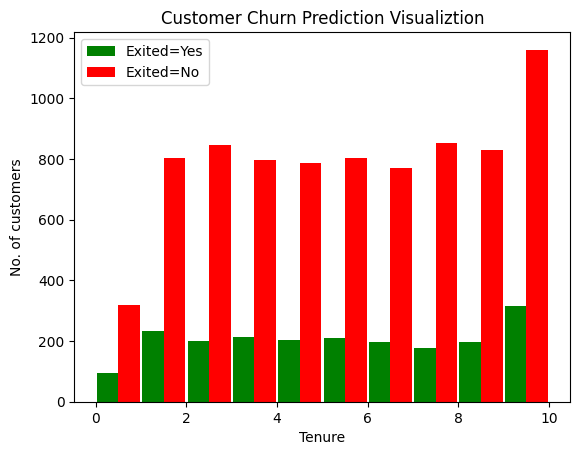

In [5]:
tenure_churn_no=df[df.Exited==0].Tenure
tenure_churn_yes=df[df.Exited==1].Tenure

plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=.95,color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

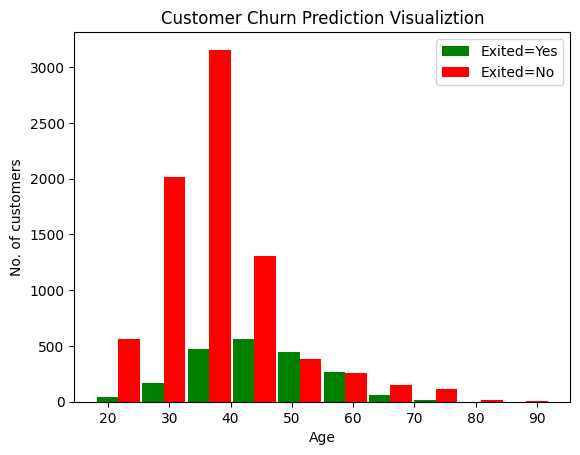

In [6]:
age_churn_no=df[df.Exited==0].Age
age_churn_yes=df[df.Exited==1].Age

plt.xlabel('Age')
plt.ylabel('No. of customers')
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([age_churn_yes,age_churn_no],rwidth=.95,color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

Encode Gender

In [7]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})

Encode Geography (One-Hot)

In [8]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [9]:
X=df.drop('Exited',axis=1)
y=df['Exited']

# Train–Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=.2,random_state=42
)

In [11]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train: (8000, 11)
y_train: (8000,)
X_test : (2000, 11)
y_test : (2000,)


# Feature Scaling

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [13]:
print("X_train_scaled:", X_train_scaled.shape)
print("y_train:", y_train.shape)

X_train_scaled: (8000, 11)
y_train: (8000,)


# Build ANN Model

In [14]:
model=Sequential([
    Dense(16,activation='relu',input_shape=(X_train_scaled.shape[1],)),
    Dropout(.3),
    Dense(8,activation='relu'),
    Dropout(.3),
    Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history=model.fit(
    X_train_scaled,y_train,
    epochs=20,
    batch_size=32,
    validation_split=.1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7375 - loss: 0.5777 - val_accuracy: 0.8037 - val_loss: 0.4759
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7873 - loss: 0.5177 - val_accuracy: 0.8037 - val_loss: 0.4446
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7894 - loss: 0.5049 - val_accuracy: 0.8037 - val_loss: 0.4294
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.4751 - val_accuracy: 0.8037 - val_loss: 0.4229
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4583 - val_accuracy: 0.8075 - val_loss: 0.4141
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4548 - val_accuracy: 0.8125 - val_loss: 0.4104
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8096 - loss: 0.4584 - val_accuracy: 0.8200 - val_loss: 0.4040
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8119 - loss: 0.4449 - val_accuracy: 0.

In [15]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print("Test Accuracy: ",accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8503 - loss: 0.3567
Test Accuracy:  0.8539999723434448


## Predictions

In [16]:
y_pred_prob=model.predict(X_test_scaled)
y_pred=(y_pred_prob>0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


# Confusion Matrix & Report

In [17]:
print("Confusion Matrix:\n" ,confusion_matrix(y_test,y_pred))
print("Classification Report:\n" ,classification_report(y_test,y_pred))

Confusion Matrix:
 [[1576   31]
 [ 261  132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.34      0.47       393

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000

